## Distributions

*Coding along with third edition of the online version of __[Think Stats](https://allendowney.github.io/ThinkStats/chap02.html)__ by Allen Downey.*

#### __Distributions in Statistics__

A distribution in statistics describes how data is spread out or arranged - essentially, it's a mathematical function that shows how often different values occur in a dataset. Think of it as a way to understand the "shape" of your data.

Here are the key aspects of distributions:

***Central Tendency*** - This shows where the data tends to cluster, typically measured by:
- Mean (average)
- Median (middle value)
- Mode (most frequent value)

***Spread*** - This indicates how dispersed the data is, measured by:
- Range (difference between highest and lowest values)
- Standard deviation (average distance from the mean)
- Variance (standard deviation squared)

__Some common types of distributions include:__

***Normal Distribution (Bell Curve):***
- Symmetrical shape with most data clustered in the middle
- Examples: heights in a population, test scores
- Often occurs naturally in many phenomena

***Uniform Distribution:***
- All values have equal probability of occurring
- Example: rolling a fair die

***Skewed Distributions:***
- Right-skewed: tail extends to the right (higher values)
- Left-skewed: tail extends to the left (lower values)
- Example: income distributions are often right-skewed

Understanding distributions helps us:
- Make predictions about future data
- Identify unusual values or outliers
- Choose appropriate statistical tests
- Make informed decisions based on data patterns

*(Source: Claude.ai)*

In [216]:
import empiricaldist
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/AllenDowney/ThinkBayes/blob/master/code/thinkstats.py
from thinkstats import decorate

## Histograms (Frequency Tables)

A histogram is a visual representation of a distribution that shows the frequency of data points falling within specific ranges or "bins." Think of it like a bar chart where each bar represents how many data points fall within a particular range.

Here's why histograms are particularly useful:

1. They give you an immediate visual sense of:
   - Where most of your data is concentrated
   - The overall shape of your distribution
   - Any unusual patterns or outliers

2. For example, if you measured the heights of 1000 adults:
   - Each bar might represent a 2-inch range (60-62 inches, 62-64 inches, etc.)
   - The height of each bar shows how many people fall within that range
   - You might see a bell-shaped curve typical of height distributions

What makes histograms especially powerful is that they transform raw numbers into a pattern you can understand at a glance. If someone handed you a spreadsheet with 1000 height measurements, it would be hard to spot patterns. But a histogram instantly shows you if the heights cluster around a central value, if they're skewed to one side, or if there are any unexpected gaps or peaks.

*(Source: Claude.ai)*

One way to desrcribe a variable are frequency tables. They contain the values the variable and their frequencies (number of times each value appears). Such a description is called the __distribution of the variable__.

In [217]:
from empiricaldist import Hist # library that represents distributions

In [218]:
t = [1.0, 2.0, 2.0, 3.0, 5.0] # let's start with a small list of values

In [219]:
# Hist from the empiricaldist package provides a method called `from_seq`
# `from_seq` takes a sequence and makes a `Hist` object
hist = Hist.from_seq(t)
hist

,freqs
1.0,1
2.0,2
3.0,1
5.0,1


A `Hist` object is a kind of Pandas `Series` that contains quantities and their frequencies.
In our example the quantity `1.0` corresponds to frequency 1, the quantity `2.0` corresponds to frequency 2, etc.

In [220]:
# another way to compute and plot frequency tables is a class called FreqTab
from empiricaldist import FreqTab
ftab = FreqTab.from_seq(t)
ftab

,freqs
1.0,1
2.0,2
3.0,1
5.0,1


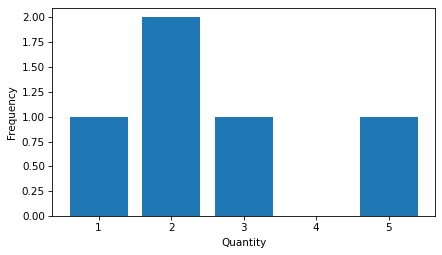

In [221]:
# `Hist` provides a method called `bar` that plots the histogram as a bar chart
hist.bar()
decorate(xlabel="Quantity", ylabel="Frequency") # naming the axes

In [222]:
hist[2.0] # looking up a quantity to get its frequency

np.int64(2)

In [223]:
hist(2.0) # can also be called like a function

np.int64(2)

In [224]:
hist(4.0) # looking up a quantity that has no frequency returns 0

0

In [225]:
# qs attribute returns an array of quantities
hist.qs

array([1., 2., 3., 5.])

In [226]:
# ps attribute returns an array of frequencies
hist.ps

array([1, 2, 1, 1])

In [227]:
# items method allows to loop through quantity-frequency pairs
for (x, freq) in hist.items():
    print(x, freq)

1.0 1
2.0 2
3.0 1
5.0 1


## NSFG Distributions

Exploring the variables we are planning to use one at a time by looking at histograms. Once again our example is a dataset from the National Survey of Family Growth (NSFG). This time we're using a module called `nsfg.py` to load and clean the data (kindly provided by the author of the *Think Stats* book).

In [228]:
from nsfg import read_fem_preg

In [229]:
preg = read_fem_preg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875


In [230]:
# selecting pregnancies that ended in live birth
live = preg.query("outcome == 1")
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,1234,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,1234,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000


In [231]:
# using Hist.from_seq to count the number of times each quantity appears in birthwgt_lb
# which is the pounds part of the birth weights
# the name argument gives the Hist object a name/label
hist = Hist.from_seq(live["birthwgt_lb"], name="birthwgt_lb")

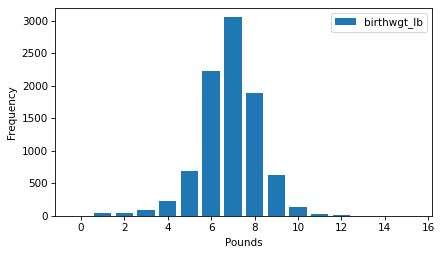

In [232]:
# plotting the distribution
hist.bar()
decorate(xlabel="Pounds", ylabel="Frequency")

Looking at a distribution like this, the first thing we notice is 

The shape of the distribution we get which resembles a __bell curve__, aka a __normal distribution__ or a __Gaussian distribution__. One of the more notable feature of the distribution is the __mode__, the most common value.

In [233]:
# finding the mode with idxmax
# which finds the quantity associated with the highest frequency
hist.idxmax()

np.float64(7.0)

In [234]:
hist.mode() # mode() does the job too
# in this distribution the mode is at 7 pounds

np.float64(7.0)

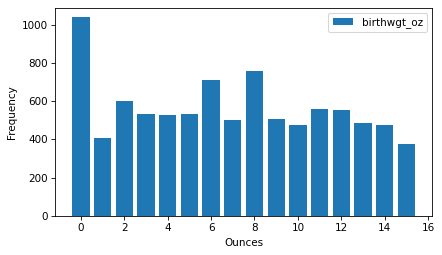

In [235]:
# another example: frequency table of birthwgt_oz
hist_birthwgt = Hist.from_seq(live["birthwgt_oz"], name="birthwgt_oz")
hist_birthwgt.bar()
decorate(xlabel="Ounces", ylabel="Frequency")

All values for ounces seem to be equally likely which means the distribution we're getting is __uniform__. It looks like 0 is more common than the other quantities and 1 and 15 are less common which suggests that respondents round off birth weights that are close to a whole number of pounds (https://allendowney.github.io/ThinkStats/chap02.html).

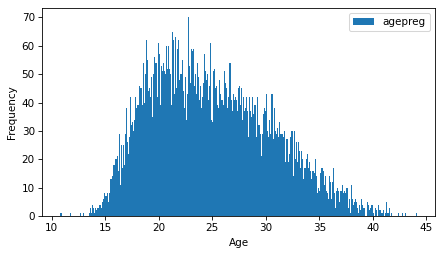

In [236]:
# another example: frequency table of agepreg, the mother’s age at the end of pregnancy
hist_agepreg = Hist.from_seq(live["agepreg"], name="agepreg")
# age is reported in years and months
# so there are more unique values than in the other distributions we’ve looked at
# we’ll pass width=0.1 as a keyword argument to the bar method
# which adjusts the width of the bars so they don’t overlap too much
hist_agepreg.bar(width=0.1)
decorate(xlabel="Age", ylabel="Frequency")

The distribution is only roughly bell-shaped and is __skewed__ to the right (the tail extends farther right than left).

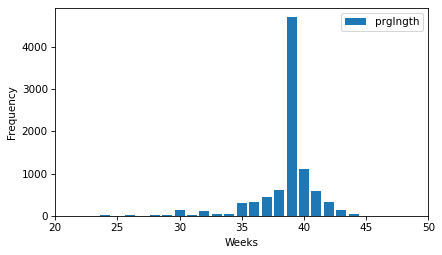

In [237]:
# final example: the frequency table of prglngth
# which is the length of the pregnancy in weeks
# the xlim argument sets the limit of the x-axis to the range from 20 to 50 weeks 
# there are not many values outside this range and they are probably errors
hist_length = Hist.from_seq(live["prglngth"], name="prglngth")
hist_length.bar()
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

- The most common quantity is 39 weeks.
- The left tail is longer than the right which indicates that early babies are common.
- Pregnancies seldom go past 43 weeks (doctors often intervene if they do).

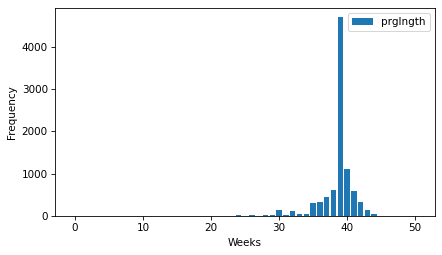

In [238]:
# without range set
# outliers are probably errors
hist_length = Hist.from_seq(live["prglngth"], name="prglngth")
hist_length.bar()
decorate(xlabel="Weeks", ylabel="Frequency")

## Outliers

Outliers in statistics are data points that differ significantly from other observations in a dataset. 

Outliers are values that deviate so far from other data points that they might have been generated by a different mechanism or could potentially be errors. For example, if you're looking at adult human heights and see a value of 8 feet, that would likely be an outlier since it's extremely unusual.

There are two main types of outliers:
1. __Statistical outliers__: Points that fall far from the central tendency of the data, typically defined as being more than 1.5 times the interquartile range above the third quartile or below the first quartile
2. __Domain outliers__: Points that are unusual given the context of what's being measured, even if they're not statistically extreme

Outliers can affect your analysis in several ways:
- They can skew averages significantly
- They can distort statistical tests
- They can lead to incorrect conclusions if not properly handled

However, outliers aren't always errors. Sometimes they represent genuine, important phenomena that deserve special attention. A famous example is the discovery of Neptune, which was prompted by investigating outliers in Uranus's orbital data.

When dealing with outliers, statisticians typically:
- Investigate why they occurred
- Determine if they represent errors or genuine phenomena
- Consider whether to remove them or use robust statistical methods that are less sensitive to extreme values

*(Source: Claude.ai)*

We're going to check for outliers in our pregnancies dataset before we continue with our analysis. Outliers are extreme quantities that might be ***measurement or recording errors or might be accurate reports of rare events***.

In [239]:
# the following function takes a FreqTab (Hist) object and an integer n
# and uses a slice index to select the n smallest quantities and their frequencies
def smallest(ftab, n=10):
    return ftab[:n]

In [240]:
# hist_length was created above as the frequency table of prglngth (pregnancy length) (length of the pregnancy in weeks)
smallest(hist_length) # contains only rows for live births

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: prglngth, dtype: int64

In [241]:
# selecting the largest values from a Hist object
def largest(ftab, n=10):
    return ftab[-n:]

In [242]:
largest(hist_length) # contains only rows for live births

prglngth
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

Some of the largest and smallest values are probably errors. Since we selected the rows for live births, pregnancy lengths less than 10 weeks are certainly errors. The most likely explanation is that the outcome was not coded correctly. Lengths higher than 30 weeks are probably legitimate. Most doctors recommend induced labor if a pregnancy exceeds 41 weeks, so 50 weeks seems unlikely to be correct. But there is no clear line between values that are certainly errors and values that might be correct reports of rare events (quoted from https://allendowney.github.io/ThinkStats/chap02.html#outliers).

## First Babies

Our goal here is to compare the distribution of pregnancy lengths for first babies and others. We'll use the query method to select rows that represent first babies and others.

In [243]:
firsts = live.query("birthord == 1")
firsts

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,1231,8.5625
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,1233,7.5625
10,12,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,1231,7.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,12565,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3195.641221,3834.241709,6652.409365,1,78,1236,6.4375
13578,12566,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2080.317155,2422.820274,2627.548587,2,2,1235,6.0000
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,1234,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,1234,6.3750


In [244]:
others = live.query("birthord != 1")
others

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,1231,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,1231,8.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,12556,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2474.619764,3250.573384,3965.699528,1,44,1236,5.8125
13574,12561,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2418.089703,2698.650781,4497.301527,1,10,1231,6.1250
13579,12566,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2080.317155,2422.820274,2627.548587,2,2,1235,7.0000
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000


In [245]:
# making a Hist of pregnancy lengths for each group
first_hist = Hist.from_seq(firsts["prglngth"], name="firsts")
other_hist = Hist.from_seq(others["prglngth"], name="others")

In [246]:
# function to plot two histograms side-by-side
def two_bar_plots(hist1, hist2, width=0.45, **options):
    hist1.bar(align="edge", width=-width, **options)
    hist2.bar(align="edge", width=width, **options)

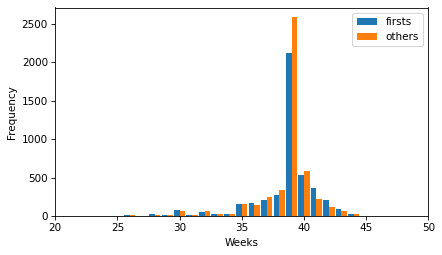

In [247]:
two_bar_plots(first_hist, other_hist)
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

__What we see in the plot:__
- There is no obvious difference in the shape of the distributions or in the outliers.
- It looks like more of the non-first babies are born during week 39 (there are more non-first babies in the dataset, so we should not compare the counts directly)

In [248]:
firsts["prglngth"].count(), others["prglngth"].count()

(np.int64(4413), np.int64(4735))

In [249]:
# comparing the means of the distributions
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean # it looks like first babies are a little bit later on average

(np.float64(38.60095173351461), np.float64(38.52291446673706))

In [250]:
diff = first_mean - other_mean
diff, diff * 7 * 24 # difference in 0.078 weeks, difference in hours

(np.float64(0.07803726677754952), np.float64(13.11026081862832))

The difference is 0.078 weeks which is about 13 hours.

__Possible causes of this apparent difference (according to the book's author)__:

* There might be an actual difference in average pregnancy length between first babies and others.

* The apparent difference we see in this dataset might be the result of bias in the sampling process -- that is, the selection of survey respondents.

* The apparent difference might be the result of random variation in the sampling process.

## Effect Size

A difference like we just found it is called an __effect__. The simplest way to quantify the magnitude of an effect is to report the difference in __absolute terms_-. In our example the difference is 0.78 weeks.

Another way is to report the difference in __relative terms__. In this context we might say, that first pregnancies are 0.2% longer than others on average.

In [251]:
diff / live["prglngth"].mean() * 100 # difference in relative terms

np.float64(0.20237586646738304)

In [252]:
print("The difference in relative terms in this context is, that first pregnancies are", round(diff / live["prglngth"].mean() * 100, 2) ,"% longer than others on average.")

The difference in relative terms in this context is, that first pregnancies are 0.2 % longer than others on average.


__Effect size__ in statistics is a measure that describes the magnitude or strength of a relationship between variables, regardless of sample size.

***Effect size helps answer not just whether there is a difference or relationship, but how large or meaningful that difference or relationship is.*** For example, a drug might show a statistically significant effect on reducing blood pressure, but the effect size tells us whether that reduction is large enough to be clinically meaningful.

Common measures of effect size include:

1. Cohen's d
- Used for comparing means between groups
- d = 0.2 is considered small
- d = 0.5 is considered medium
- d = 0.8 is considered large

2. Correlation coefficient (r)
- Measures strength of relationship between variables
- Values range from -1 to +1
- The closer to ±1, the stronger the relationship

3. Odds ratio
- Common in medical research
- Compares the relative odds of an outcome between groups
- An odds ratio of 1 means no effect

4. Eta squared (η²)
- Used in ANOVA
- Represents proportion of variance explained
- Values range from 0 to 1

Effect size is particularly important because:
- It's less sensitive to sample size than p-values
- It allows for meaningful comparisons across different studies
- It helps determine practical significance rather than just statistical significance
- It's essential for meta-analyses and power calculations

For example, if you're studying a teaching method, an effect size could tell you not just whether it works, but how much better it is than traditional methods, helping decide if it's worth implementing.

If we want to use a statistic intended to quantify the size of an effect in a way that is comparable between different quantities and different groups, reporting a __standardized effect size__ is the option we have.

In [253]:
# "standardizing" as expressing the difference as a multiple of the standard deviation
diff / live["prglngth"].std()

np.float64(0.028877623375210403)

If we use this measurement we might get a distorted effect, depending on different size of the groups we're comparing.

If the groups are substantially different, the standard deviation put together (for both groups) is larger than in either group which might make the effect size seem small.

An alternative is to use the standard deviation of just one group, but it's not clear which. 

If we take the average of the two standard deviations it would give too much weight to one group (and not enough to the other) if the groups are of different size.

#### __Pooled standard deviation__

One solution is to use a __pooled standard deviation__ which is the square root of pooled variance.

The square root of pooled variance is the weighted sum of the variances in the groups.

In [254]:
# let's start with the variances
group1, group2 = firsts["prglngth"], others["prglngth"]
v1, v2 = group1.var(), group2.var()
v1, v2

(np.float64(7.794713509229203), np.float64(6.842683519298484))

In [255]:
# now lets calculate the weighted sum with the group sizes as weights
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

In [256]:
# the pooled standard deviation
np.sqrt(pooled_var)

np.float64(2.7022108144953862)

In [257]:
# the pooled standard deviation is between the standard deviations of the groups
firsts["prglngth"].std(), others["prglngth"].std()

(np.float64(2.7919014146687204), np.float64(2.6158523504392375))

A standardized effect size that uses pooled standard deviation is called **Cohen's effect size**.

In [258]:
# function that computes Cohen's effect size
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()

    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

    return diff / np.sqrt(pooled_var)

In [259]:
# the effect size for the difference in mean pregnancy lengths using the Cohen coefficient
cohen_effect_size(firsts["prglngth"], others["prglngth"])

np.float64(0.028879044654449834)

***The difference between the two groups in this example is 0.029 standard deviations, which is small.***
</br>To put that in perspective: the difference in height between men and women is about 1.7 standard deviations.
</br>(Source: https://allendowney.github.io/ThinkStats/chap02.html#effect-size)

### __Pooled Standard Deviation and Cohen's Effect Size according to Claude.ai:__

__Pooled Standard Deviation__:
- When comparing two groups, we often need a single measure of spread that takes into account both groups' variability
- It's a weighted average of the standard deviations from multiple groups, with weights based on sample sizes
- The formula gives more weight to larger groups
- Formula: sqrt(((n₁-1)s₁² + (n₂-1)s₂²) / (n₁ + n₂ - 2))
  where n₁, n₂ are sample sizes and s₁, s₂ are standard deviations

__Cohen's Effect Size (d)__:
- Measures the standardized difference between two group means
- Uses pooled standard deviation as the standardizer
- Formula: d = (mean₁ - mean₂) / pooled_std
- Tells us how many standard deviations apart the means are

__The relationship__:
- Pooled standard deviation serves as the denominator in Cohen's d
- This standardization allows comparison across different studies/scales
- The pooled SD "normalizes" the mean difference

Here's a __Python example__ showing both calculations:

```python
import numpy as np
from scipy import stats

# Sample data: Test scores for two teaching methods
method_a = np.array([82, 84, 85, 89, 91, 90, 88, 87])
method_b = np.array([75, 78, 77, 79, 80, 81, 76, 77, 78])

# Calculate means
mean_a = np.mean(method_a)
mean_b = np.mean(method_b)

# Calculate standard deviations
std_a = np.std(method_a, ddof=1)  # ddof=1 for sample standard deviation
std_b = np.std(method_b, ddof=1)

# Calculate pooled standard deviation
n_a = len(method_a)
n_b = len(method_b)
pooled_std = np.sqrt(((n_a-1)*std_a**2 + (n_b-1)*std_b**2) / (n_a + n_b - 2))

# Calculate Cohen's d
cohens_d = (mean_a - mean_b) / pooled_std

print(f"Method A mean: {mean_a:.2f}")
print(f"Method B mean: {mean_b:.2f}")
print(f"Method A std: {std_a:.2f}")
print(f"Method B std: {std_b:.2f}")
print(f"Pooled std: {pooled_std:.2f}")
print(f"Cohen's d: {cohens_d:.2f}")
```

In this example:
1. We have test scores from two teaching methods
2. We calculate the pooled standard deviation to get a common measure of spread
3. We use this to calculate Cohen's d
4. A positive Cohen's d indicates Method A has higher scores
5. The magnitude tells us how large the difference is in standard deviation units

If we get a Cohen's d of 2.0, it means Method A's mean is 2 pooled standard deviations higher than Method B's mean, indicating a large effect size. This standardized measure allows us to compare the effectiveness of teaching methods across different subjects or scales.

__Here are the conventional thresholds for interpreting Cohen's d effect sizes__:

1. Small effect: d = 0.2
- Indicates a subtle difference
- May be difficult to detect without careful measurement
- Example: Height difference between 15 and 16-year-olds

2. Medium effect: d = 0.5
- A noticeable difference
- Visible to careful observation
- Example: Height difference between 14 and 18-year-olds

3. Large effect: d = 0.8
- A clearly visible difference
- Easy to spot
- Example: Height difference between men and women

4. Very large effect: d > 1.2
- Extremely obvious difference
- Rare in social/behavioral research
- Example: Height difference between 8 and 18-year-olds

However, it's __important to note__:
- These are just guidelines, not rigid rules
- What counts as "meaningful" depends on your field and context
- In medical research, even d = 0.2 could be meaningful if it means saving lives
- In physics or engineering, you might need much larger effects
- Cost and ease of implementation should factor into interpretation
- ***Sometimes small effects on important outcomes matter more than large effects on trivial ones***

The key is to interpret effect sizes in the context of your specific research question and field of study.

## Reporting results

How we should report these results depends on who is asking the question.
    
- A scientist might be interested in any (real) effect, no matter how small.
- A doctor might only care about effects that are **practically significant** - that is, differences that affect treatment decisions.
- A pregnant woman might be interested in results that are relevant to her, like the probability of delivering early or late.

How you report results also depends on your goals.
If you are trying to demonstrate the importance of an effect, you might choose summary statistics that emphasize differences.
If you are trying to reassure a patient, you might choose statistics that put the differences in context.

Of course your decisions should also be guided by professional ethics.
It's OK to be persuasive -- you *should* design statistical reports and visualizations that tell a story clearly.
But you should also do your best to make your reports honest, and to acknowledge uncertainty and limitations.

(Source: https://allendowney.github.io/ThinkStats/chap02.html#reporting-results)

## Glossary


-   **distribution**: The set of quantities in a sample and how frequently each quantity appears.

-   **histogram**: A mapping from quantities to frequencies, or a graph that shows this mapping.

-   **frequency**: The number of times a quantity appears in a sample.

-   **skewed:** A distribution is skewed if it is asymmetrical, with extreme quantities extending farther in one direction than the other.

-   **mode**: The most frequent quantity in a sample, or one of the most frequent quantities.

-   **uniform distribution**: A distribution in which all quantities have the same frequency.

-   **outlier**: An extreme quantity in a distribution.

-   **standardized:** A statistic is standardized if it is expressed in terms that are comparable across different datasets and domains.

-   **pooled standard deviation:** A statistic that combines data from two or more groups to compute a common standard deviation.

-   **Cohen's effect size:** A standardized statistic that quantifies the difference in the means of two groups.

-   **practically significant:** An effect is practically significant if it is big enough to matter in practice.

(Source: https://allendowney.github.io/ThinkStats/chap02.html#glossary)

## Excercises

For the exercises in this chapter, the NSFG female respondent file is used. This file contains one row for each female respondent.

In [260]:
from nsfg import read_fem_resp
# reading the respondent file with the nsfg.py module
resp = read_fem_resp()
resp.shape

(7643, 3092)

### Exercise # 1

### Exercise # 1

The `totincr` column records the total income for the respondent's family, encoded with a value from 1 to 14.

<pre>
<b>TOTINCR (4831 - 4832)</b>
    
Total income of R's family
    
Value Label            Total
1     UNDER $5000      299
2     $5000-$7499      301
3     $7500-$9999      266
4     $10,000-$12,499  421
5     $12,500-$14,999  445
6     $15,000-$19,999  559
7     $20,000-$24,999  583
8     $25,000-$29,999  606
9     $30,000-$34,999  607
10    $35,000-$39,999  468
11    $40,000-$49,999  647
12    $50,000-$59,000  658
13    $60,000-$74,999  623
14    $75,000 OR MORE  1160
      <b>Total            7643</b>
</pre>

For this excercise, make a `Hist` object to represent the distribution of this variable and plot it as a bar chart.

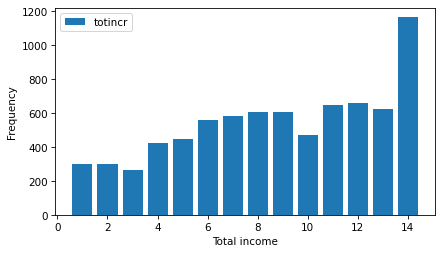

In [261]:
hist = Hist.from_seq(resp["totincr"], name="totincr")
hist.bar()
decorate(xlabel="Total income", ylabel="Frequency")

### Exercise # 2

Make a histogram of the `parity` column, which records the number of children each respondent has borne.

<pre>
<b>numbabes (73 - 74)</b>
    
Number of babies born alive to R (parity) (computed)

Value  Label             Total
0      0 BABIES          3229
1      1 BABY            1519
2      2 BABIES          1603
3      3 BABIES          828
4      4 BABIES          309
5-95   5 OR MORE BABIES  154
97     Not ascertained   1
       <b>Total             7643</b>
</pre>

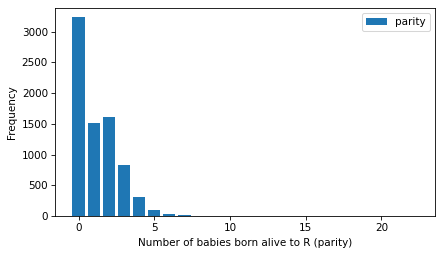

In [262]:
hist_parity = Hist.from_seq(resp["parity"], name="parity")
hist_parity.bar()
decorate(xlabel="Number of babies born alive to R (parity)", ylabel="Frequency")

<b>How would you describe the shape of this distribution?</b>
<br>It has a long right tail so it should be right-skewed.

Use the largest function to find the largest values of parity. Are there any values you think are errors?

In [263]:
largest(hist_parity)

parity
3     828
4     309
5      95
6      29
7      15
8       8
9       2
10      3
16      1
22      1
Name: parity, dtype: int64

<b>Are there any values you think are errors?</b>
<br>Yes, 16 and 22 seem to be quite much.

### Excercise # 3

Let’s investigate whether people with higher income bear more children. Use the query method to select the respondents with the highest income (level 14). Plot the frequency table of parity for just the high income respondents.

Compare the mean parity for high income respondents and others.

Compute the Cohen effect size for this difference. How does it compare with the difference in pregnancy length for first babies and others?

Do these results show that people with higher income have more children, or can you think of another explanation for the apparent difference?

In [264]:
# using the query method to select the respondents with the highest income (level 14)
highest_income = resp.query("totincr == 14")
highest_income

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,sest,cmintvw,cmlstyr,screentime,intvlngth,agemarry,age,year,decade,fives
45,7081,5,5,3,1,5.0,35,35,805,35,...,83,1233,1221,11:40:08,103.980333,23.416667,35.666667,67,6,13
48,9242,5,5,2,1,5.0,29,29,888,29,...,83,1237,1225,12:02:18,69.112833,23.000000,29.083333,73,7,14
53,8785,5,5,3,1,5.0,37,37,793,37,...,83,1238,1226,18:20:56,68.210167,23.916667,37.083333,66,6,13
54,1511,1,5,5,5,5.0,42,42,731,42,...,83,1238,1226,16:35:27,66.828833,21.500000,42.250000,60,6,12
74,8269,1,5,3,5,5.0,24,24,939,24,...,55,1231,1219,15:07:17,87.511833,21.250000,24.333333,78,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7623,7574,5,5,4,5,5.0,19,19,997,19,...,76,1228,1216,16:09:34,96.809833,NaN,19.250000,83,8,16
7625,6288,5,1,3,5,2.0,20,20,986,20,...,76,1227,1215,17:40:15,93.622333,NaN,20.083333,82,8,16
7628,6365,5,5,3,5,2.0,17,17,1028,17,...,76,1235,1223,17:15:36,46.016667,NaN,17.250000,85,8,17
7638,11018,1,5,2,5,3.0,34,34,811,34,...,76,1228,1216,15:57:38,82.907333,18.416667,34.750000,67,6,13


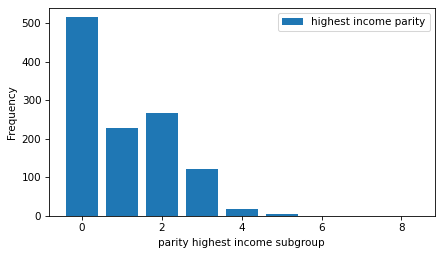

In [265]:
# plotting the frequency table of parity for just the high income respondents
high_hist_parity = Hist.from_seq(highest_income["parity"], name="highest income parity")
high_hist_parity.bar()
decorate(xlabel="parity highest income subgroup", ylabel="Frequency")

In [266]:
# compare the mean parity for high income respondents and others
# we already have the high income group
# now for the others
below_highest_income = resp.query("totincr != 14")
below_highest_income

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,sest,cmintvw,cmlstyr,screentime,intvlngth,agemarry,age,year,decade,fives
0,2298,1,5,5,1,5.0,27,27,902,27,...,18,1234,1222,18:26:36,110.492667,NaN,27.666667,75,7,15
1,5012,1,5,1,5,5.0,42,42,718,42,...,18,1233,1221,16:30:59,64.294000,21.333333,42.916667,59,5,11
2,11586,1,5,1,5,5.0,43,43,708,43,...,18,1234,1222,18:19:09,75.149167,16.833333,43.833333,58,5,11
3,6794,5,5,4,1,5.0,15,15,1042,15,...,18,1234,1222,15:54:43,28.642833,NaN,16.000000,86,8,17
4,616,1,5,4,1,5.0,20,20,991,20,...,18,1233,1221,14:19:44,69.502667,NaN,20.166667,82,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,4964,1,5,3,5,3.0,41,41,727,41,...,76,1227,1215,12:38:19,306.238000,18.833333,41.666667,60,6,12
7637,143,1,5,1,5,2.0,35,35,808,35,...,76,1230,1218,17:45:36,83.798833,21.000000,35.166667,67,6,13
7640,5649,1,5,2,5,5.0,29,29,873,29,...,76,1228,1216,18:42:41,68.168000,NaN,29.583333,72,7,14
7641,501,5,5,3,5,2.0,16,16,1034,16,...,76,1228,1216,16:02:45,32.717333,NaN,16.166667,86,8,17


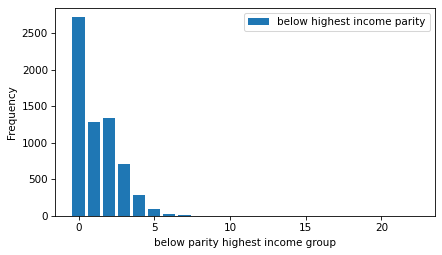

In [267]:
# plotting the frequency table of parity for the below high income respondents
below_high_hist_parity = Hist.from_seq(below_highest_income["parity"], name="below highest income parity")
below_high_hist_parity.bar()
decorate(xlabel="below parity highest income group", ylabel="Frequency")

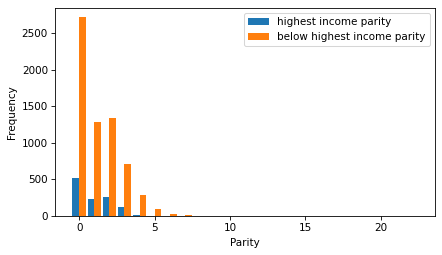

In [268]:
# Hist of parity for each group
highest_hist = Hist.from_seq(highest_income["parity"], name="highest income parity")
below_high_hist_parity = Hist.from_seq(below_highest_income["parity"], name="below highest income parity")
two_bar_plots(highest_hist, below_high_hist_parity)
decorate(xlabel="Parity", ylabel="Frequency")
# does this make sense and what do I see here?

In [269]:
# compare the mean parity for high income respondents and others
highest_mean = highest_income["parity"].mean()
below_highest_mean = below_highest_income["parity"].mean()
highest_mean, below_highest_mean

(np.float64(1.0758620689655172), np.float64(1.2495758136665125))

In [270]:
diff = highest_mean - below_highest_mean
diff # negative, so below highest is above highest with more babies born (or bigger pregnancy length)

np.float64(-0.17371374470099532)

In [271]:
# compute the Cohen effect size for this difference
group1, group2 = highest_income["parity"], below_highest_income["parity"]
diff = group1.mean() - group2.mean()
v1, v2 = group1.var(), group2.var()
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)
diff / np.sqrt(pooled_var)

np.float64(-0.12511855314660367)

How does it compare with the difference in pregnancy length for first babies and others?

Do these results show that people with higher income have more children, or can you think of another explanation for the apparent difference?